## 5073 Midterm
#### Spring 2023 
#### Gian Zlupko 

#### 1.  Import the spam dataset and print the first six rows.  

In [2]:
import pandas as pd 
import os

os.chdir('/Users/gianzlupko/Desktop/GR5073 ML/gr5073_ML/data')

# load spam data
spam_data = pd.read_csv("spam_dataset.csv") 

# print first 6 rows 
spam_data.head(6)


,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


#### 2.  Read through the documentation of the original dataset here:

http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names

#### The dependent variable is "spam" where one indicates that an email is spam and zero otherwise.  Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?

The three variables that I think will be important predictors of spam are 'word_freq_receive:', 'char_freq_$:', and 'capital_run_length_total'. The first variable, 'word_freq_receive', is a proportion of the total number of words in the email that match the word, 'receive'. Drawing on personal experience, I think the use of the word 'receieve' will be positively related to an email being classified as spam as I have found that many spam emails reach out with the promise to receive some prize (e.g. money, items) in exchange for the information that they are seeking. 

The second variable, 'char_freq_$:', is a proportion of the total number of characters in the body of the email that are '$'. Similar to the first variable, drawing on anecdotal experience, I have observed that many spam emails contain non-alphabetic character symbols. Further, given that the goal of spam emails is generally to entice recipients, I would expect that of all character symbols, the dollar sign would be a commonly used one. Thus, I would expect that its frequency in use would positively relate to the likelihood of an email being spam. 

Finally, the third variable that I've selected is 'capital_run_length_total'. Per the data dictionary, this variable represents the sum of the length of uninterrupted capital letters in an email. Following similar personal intuitions that led me to select the first two variables, I suspect that there may be a relationship between the total amount of capital letters used in an email and its likelihood of being spam. My rationale is that the use of 'all caps', whether for individual words or combinations of words, is a choice that individuals normally use sparingly in day-to-day contexts. For example, in professional contexts, the excessive use of capitals in email language is seen as aggressive and unprofessional. Further, when excessive levels of capital letters are used, it is psychologically very effective at communicating elevated emotions like anger and excitement. For these reasons, the use of sequences of capital letters, like 'all caps', strikes me as a potential manipulative strategy that spam emails may incorporate to solicit an unsuspecting recipient to do some task. Thus, my intuition is that capital run length will be low for non-spam emails and high in spam emails. 

In summary, these are the first three variables that I will train models on to predict whether an email is spam or not.

#### 3.  Visualize the univariate distribution of each of the variables in the previous question. 

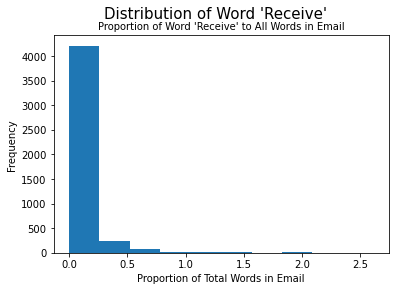

In [3]:
import matplotlib.pyplot as plt 

# visualize first variable: 'word_freq_receive:' 
plt.hist(spam_data['word_freq_receive:']) 
plt.title("Proportion of Word 'Receive' to All Words in Email", fontsize = 10)
plt.suptitle("Distribution of Word 'Receive'", fontsize = 15)
plt.ylabel("Frequency")
plt.xlabel("Proportion of Total Words in Email")
plt.show() 

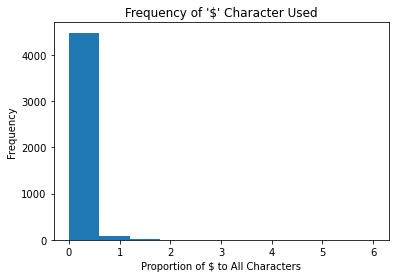

In [4]:
# visualize first variable: 'word_freq_receive:' 
plt.hist(spam_data['char_freq_$:']) 
plt.title("Frequency of '$' Character Used")
plt.ylabel("Frequency")
plt.xlabel("Proportion of $ to All Characters")
plt.show() 

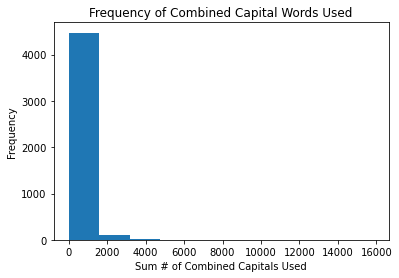

In [5]:
# visualize first variable: 'word_freq_receive:' 
plt.hist(spam_data['capital_run_length_total:']) 
plt.title("Frequency of Combined Capital Words Used")
plt.ylabel("Frequency")
plt.xlabel("Sum # of Combined Capitals Used")
plt.show() 

Each of the first three predictors that I selected appear to be significantly right-skewed with the low variance. I will be curious to see how the models perform using these variables to predict spam. 

#### 4. Name each of the supervised learning models that we have learned thus far that are used to predict dependent variables like "spam".   

In the current data set, spam is a binary categorical outcome variable that has two levels - 0 and 1. Values of 0 indicate and values of 1 indicate. In this class, we have discussed a specific set of supervised  machine learning models that are appropriate for dealing with a binary categorical outcome variable like spam. Below are a list of the supervised machine learning models that we have discussed for this kind of DV.

* Linear Models for classification: 
    * Logistic Regresssion
    * Logistic Regression with L1 Regularization (LASSO) 
    * Logistic Regression with L2 Regularization (Ridge)
    * Linear Support Vector Machine (specifically, the classifier class, SVC)
        * Note: we have briefly touched on SVM, and its classifier implemention SVC, in class though we have yet to run SVMs yet. 

* K-Nearest Neighbors 
    * note: from KNeighbors.Classifier specifically

* Tree Models
    * Decision Trees
        * Note: from DecisionTreeClassifier specifically
    * Random Forests 
        * Note: from RandomForestClassifier


#### 5. Describe the importance of training and test data. Why do we separate data into these subsets?

Splitting data into training and test data sets is a crucial step in machine learning. We split the original data into a training and test subset so that we can evaluate how well a model 'learned' from the training data and, as a result, how well it can predict the intended outcome on new data. If we did not split the original data set into a training and test set, we would not be able to properly evaluate the model. This is because if we re-tested a model on the same data that it was trained, the model would simply remember the training set and it would always predict the corect output on that data (Muller & Guido, 2017). When splitting the data, the test data is intentionally left out so that after training, the model(s) has new data in which we can evalute how accurately it is able to predict. 

Related to evaluation, creating training and test subsets of the data allows us to assess how well the model generalizes to new data. Generalization describes the extent to which a model is able to make accurate predictions on new, unseen data (e.g. test data). Models that perform well at prediction tasks on new data are said to generalize (Muller & Guido, 2017). When we train and test the model on the subsets of the orginal data that we created, we can assess the extent to which the model generalizes. If a model is not generalizing well, this could signal that the model was under or overfit on the training data. In eiter case, by splitting the data into training and test subsets in the first place, we are able to monitor for issues associated with generlization, which can be corrected for through parameter tuning or data transofmrations. However, had we not performed the data split in the first place, we would not be able to evaluate gneneralization and other performance outcomes. 

#### 6. What is k-fold cross validation and what do we use it for?

#### 7. How is k-fold cross validation different from stratified k-fold cross validation?